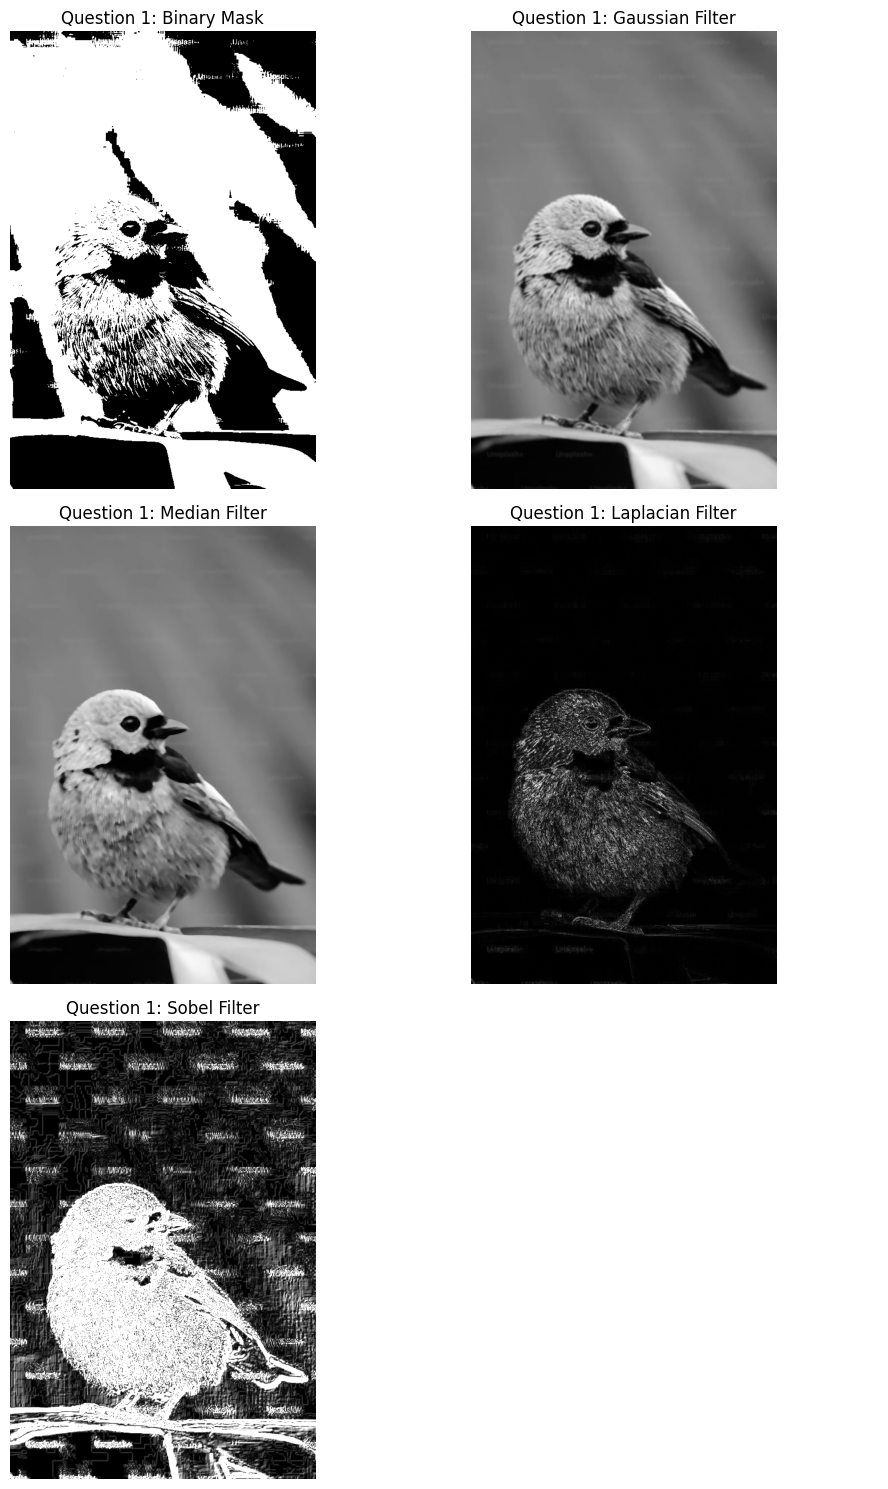

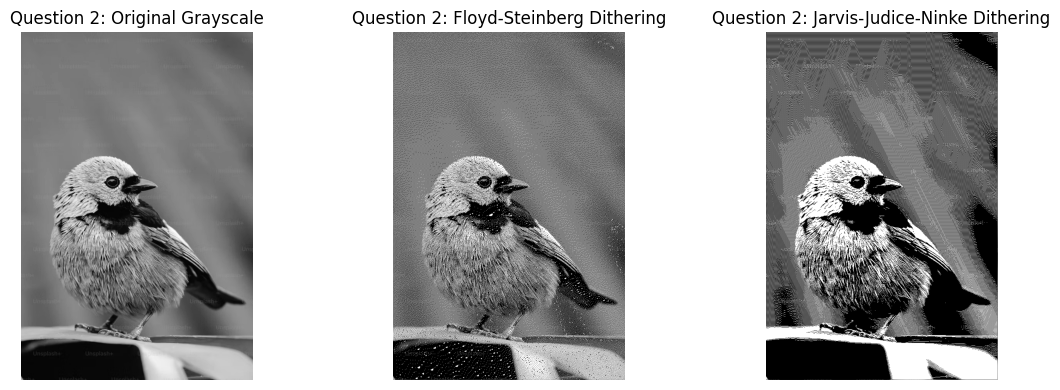

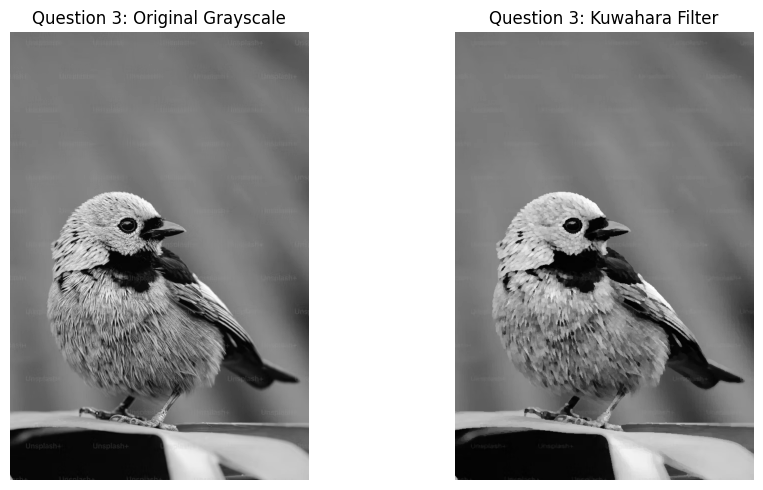

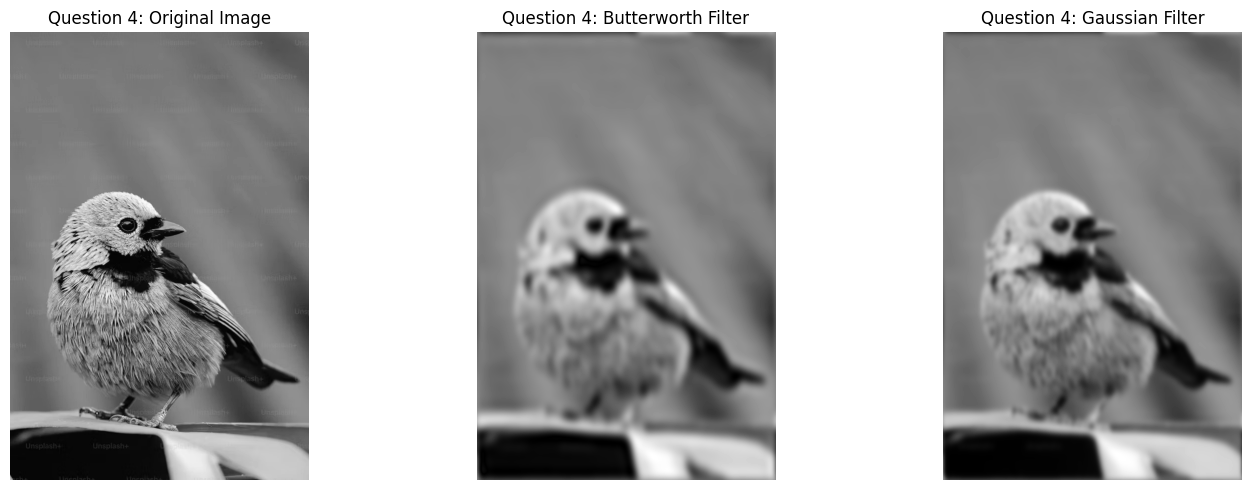

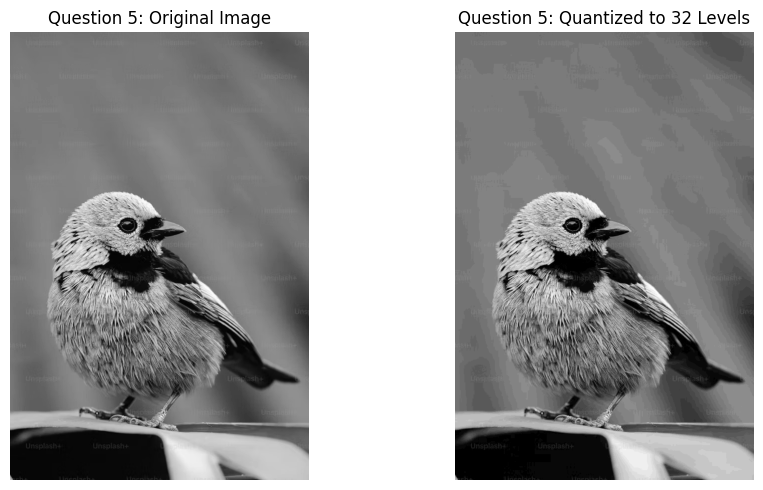

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import generic_filter

# Load the image
sujana_img = cv2.imread("C:/Users/OneDrive/Desktop/sujana_dip2.jpg")
sujana_gray = cv2.cvtColor(sujana_img, cv2.COLOR_BGR2GRAY)

# Question 1: Apply filters and create a binary mask
# Create a binary mask with a custom threshold
_, sujana_mask = cv2.threshold(sujana_gray, 115, 255, cv2.THRESH_BINARY)

# Apply Gaussian and Median filters (Low-pass filters)
sujana_gaussian_blur = cv2.GaussianBlur(sujana_gray, (7, 7), 0)
sujana_median_blur = cv2.medianBlur(sujana_gray, 7)

# Apply Laplacian and Sobel filters (High-pass filters)
sujana_laplacian = cv2.Laplacian(sujana_gray, cv2.CV_64F)
sujana_laplacian = cv2.convertScaleAbs(sujana_laplacian) 

sujana_sobel_x = cv2.Sobel(sujana_gray, cv2.CV_64F, 1, 0, ksize=5)
sujana_sobel_y = cv2.Sobel(sujana_gray, cv2.CV_64F, 0, 1, ksize=5)
sujana_sobel = cv2.convertScaleAbs(sujana_sobel_x + sujana_sobel_y)

# Display results for Question 1
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
ax = axes.ravel()
ax[0].imshow(sujana_mask, cmap='gray')
ax[0].set_title("Question 1: Binary Mask")
ax[1].imshow(sujana_gaussian_blur, cmap='gray')
ax[1].set_title("Question 1: Gaussian Filter")
ax[2].imshow(sujana_median_blur, cmap='gray')
ax[2].set_title("Question 1: Median Filter")
ax[3].imshow(sujana_laplacian, cmap='gray')
ax[3].set_title("Question 1: Laplacian Filter")
ax[4].imshow(sujana_sobel, cmap='gray')
ax[4].set_title("Question 1: Sobel Filter")
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

# Question 2: Implement Dithering Algorithms
# Load image and convert to grayscale
sujana_pil = Image.open("C:/Users/OneDrive/Desktop/sujana_dip2.jpg").convert('L')

# Floyd-Steinberg Dithering
def sujana_floyd_steinberg_dithering(image):
    pix = np.array(image)
    for i in range(image.size[1] - 1):
        for j in range(image.size[0] - 1):
            old_pixel = pix[i, j]
            new_pixel = np.round(old_pixel / 255) * 255
            pix[i, j] = new_pixel
            quant_error = old_pixel - new_pixel
            if j + 1 < image.size[0]:
                pix[i, j + 1] += quant_error * 7 / 16
            if i + 1 < image.size[1]:
                pix[i + 1, j] += quant_error * 5 / 16
                if j + 1 < image.size[0]:
                    pix[i + 1, j + 1] += quant_error * 1 / 16
                if j - 1 >= 0:
                    pix[i + 1, j - 1] += quant_error * 3 / 16
    return Image.fromarray(pix)

# Jarvis-Judice-Ninke Dithering
def sujana_jarvis_judice_ninke_dithering(image):
    pix = np.array(image)
    for i in range(image.size[1] - 2):
        for j in range(image.size[0] - 2):
            old_pixel = pix[i, j]
            new_pixel = np.round(old_pixel / 255) * 255
            pix[i, j] = new_pixel
            quant_error = old_pixel - new_pixel
            for k in range(3):
                if j + k - 1 < image.size[0] and i + 1 < image.size[1]:
                    pix[i + 1, j + k - 1] += quant_error * (1 / 48 if k == 0 else 5 / 48 if k == 1 else 3 / 48)
                if j + k - 1 < image.size[0] and i + 2 < image.size[1]:
                    pix[i + 2, j + k - 1] += quant_error * (1 / 48 if k == 0 else 3 / 48 if k == 1 else 1 / 48)
    return Image.fromarray(pix)

# Apply Dithering
sujana_fs_image = sujana_floyd_steinberg_dithering(sujana_pil)
sujana_jjn_image = sujana_jarvis_judice_ninke_dithering(sujana_pil)

# Display results for Question 2
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(sujana_pil, cmap='gray')
ax[0].set_title("Question 2: Original Grayscale")
ax[1].imshow(sujana_fs_image, cmap='gray')
ax[1].set_title("Question 2: Floyd-Steinberg Dithering")
ax[2].imshow(sujana_jjn_image, cmap='gray')
ax[2].set_title("Question 2: Jarvis-Judice-Ninke Dithering")
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

# Question 3: Kuwahara Filter
def sujana_kuwahara_filter(image, window_size):
    hsize = window_size // 2
    padded_image = np.pad(image, hsize, mode='reflect')
    output_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded_image[i:i + window_size, j:j + window_size]
            regions = [
                window[:hsize + 1, :hsize + 1],
                window[:hsize + 1, hsize:],
                window[hsize:, :hsize + 1],
                window[hsize:, hsize:]
            ]
            mean_variances = [(np.mean(region), np.var(region)) for region in regions]
            output_image[i, j] = min(mean_variances, key=lambda x: x[1])[0]

    return output_image

# Apply the Kuwahara filter with a window size of 5x5
sujana_kuwahara_result = sujana_kuwahara_filter(sujana_gray, 5)

# Display the original and Kuwahara filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sujana_gray, cmap='gray')
plt.title("Question 3: Original Grayscale")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(sujana_kuwahara_result, cmap='gray')
plt.title("Question 3: Kuwahara Filter")
plt.axis('off')
plt.tight_layout()
plt.show()

# Question 4: Fourier Transform and Filtering
# Apply Fourier Transform
sujana_f_transform = np.fft.fft2(sujana_gray)
sujana_f_shift = np.fft.fftshift(sujana_f_transform)

# Create Butterworth Low-Pass Filter
def sujana_butterworth_filter(shape, cutoff, order):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    butterworth = np.zeros((rows, cols))
    for u in range(rows):
        for v in range(cols):
            distance = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            butterworth[u, v] = 1 / (1 + (distance / cutoff) ** (2 * order))
    return butterworth

# Create Gaussian Low-Pass Filter
def sujana_gaussian_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    gauss = np.zeros((rows, cols))
    for u in range(rows):
        for v in range(cols):
            distance = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            gauss[u, v] = np.exp(-(distance ** 2) / (2 * (cutoff ** 2)))
    return gauss

# Apply Butterworth Filter
sujana_butter_filter = sujana_butterworth_filter(sujana_gray.shape, cutoff=25, order=3)
sujana_f_butter = sujana_f_shift * sujana_butter_filter
sujana_butter_img = np.abs(np.fft.ifft2(np.fft.ifftshift(sujana_f_butter)))

# Apply Gaussian Filter
sujana_gauss_filter = sujana_gaussian_filter(sujana_gray.shape, cutoff=25)
sujana_f_gauss = sujana_f_shift * sujana_gauss_filter
sujana_gauss_img = np.abs(np.fft.ifft2(np.fft.ifftshift(sujana_f_gauss)))

# Display original and filtered images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(sujana_gray, cmap='gray')
ax[0].set_title("Question 4: Original Image")
ax[1].imshow(sujana_butter_img, cmap='gray')
ax[1].set_title("Question 4: Butterworth Filter")
ax[2].imshow(sujana_gauss_img, cmap='gray')
ax[2].set_title("Question 4: Gaussian Filter")
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

# Question 5: Quantize Image to 32 Grayscale Levels
# Quantize to 32 grayscale levels
sujana_quantized_image = (sujana_gray // 8) * 8

# Display original and quantized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sujana_gray, cmap='gray')
plt.title("Question 5: Original Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(sujana_quantized_image, cmap='gray')
plt.title("Question 5: Quantized to 32 Levels")
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
1. Binary masks and filters: image segmentation and edge detection
In the first task, the grayscale image was thresholded to form a double mask, effectively removing the subject (the bird) from the background. The two masks exhibit a clear separation, revealing the bird’s appearance. After this:

A Gaussian filter was used to reduce noise and smooth the image while clarifying important features.
The median filter reproduced the smoothing while preserving edges and other important details, improving noise reduction compared to the Gaussian filter
The Laplacian filter highlighted the edges in the image, highlighting the transition between dark and light areas.
The Sobel filter combined horizontal and vertical axis (X and Y) information to provide clearer and more structured edges than the Laplacian, resulting in improved bird resolution
2. Dithering methods: Floyd-Steinberg and Jarvis-Judice-Ninke
Two algorithms were used for image dithering.

Floyd-Steinberg dithering improved the distribution of changes in intensity in the image, preserving most of the structure of the original image and virtually no changes in the grayscale
The Jarvis-Judis-Ninke dithering produced a very aggressive dithering effect, smoothing the image into areas of high contrast, giving it a very blocky, pixelated look, which is characteristic of this method.

Two surprising results reveal detail, with Floyd-Steinberg providing coarser detail and Jarvis-Judis-Nink introducing larger groups of differences

3. Kuwahara filter: Edge preservation cum smoothing
A Kuwaha filter was applied in order to achieve edge-preserving smoothing. The results effectively softened the textures in the body of the bird, while still clearly retaining outlines and features. Comparison of the original grayscale image with the Kuwahara-filtered version shows that this method increases the clarity of the image by removing fine noise artifacts, making it useful for edge-related tasks

4. Frequency-Domain Filters: Butterworth and Gaussian filters
Two low-pass filters were applied in the frequency domain:

The Butterworth filter provided a balanced smoothing effect that smoothed the image while preserving detail. The bird effectively eliminated loud noises while preserving the integrity of the structure.
The Gaussian filter produced a much stronger blur, further smoothing out details. This filter gave a perfect circular image, removed fine details and left only the basics.
A comparison of these two filters demonstrates the ability of the Butterworth filter to retain more information compared to the accurate smoothing capabilities of the Gaussian filter

5. Quantity: Reduces to 32 grayscale levels
In the latter work, the grayscale image was enlarged to 32 levels, clearly showing simplification by reducing the number of gray shades to create an abstract and blocky rendering of the original image, with few voice sequences and even though basic shapes and features are retained the bird.